<a href="https://colab.research.google.com/github/Ibteda-Hafiz/hospital-billing-system-project/blob/main/E_commerce_Furniture_Dataset_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/ecommerce_furniture_dataset_2024.csv')

In [ ]:
print(df.columns)

Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')


**DATA CLEANING**

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Number of missing values per column:")
print(missing_values)
print("\nPercentage of missing values per column:")
print(missing_percentage)

Number of missing values per column:
productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

Percentage of missing values per column:
productTitle      0.00
originalPrice    75.65
price             0.00
sold              0.00
tagText           0.15
dtype: float64


In [ ]:
df['tagText'] = df['tagText'].fillna(df['tagText'].mode()[0])
print(df.isnull().sum())
print(df.columns)

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             0
dtype: int64
Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')


In [ ]:
print(df['price'].dtype)
print(df['sold'].dtype)
if df['price'].dtype == 'object':
  df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
if df['sold'].dtype != 'int64':
  df['sold'] = df['sold'].astype(int)
print(df['price'].dtype)
print(df['sold'].dtype)

object
int64
float64
int64


In [ ]:
print(df['price'].dtype)
print(df['sold'].dtype)
if df['price'].dtype == 'object':
  df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
if df['sold'].dtype != 'int64':
  df['sold'] = df['sold'].astype(int)
print(df['price'].dtype)
print(df['sold'].dtype)

float64
int64
float64
int64


In [ ]:
print("Number of missing values per column after cleaning:")
print(df.isnull().sum())
print("\nData types after cleaning:")
print(df.dtypes)
print("\nFirst few rows of the cleaned DataFrame:")
display(df.head())

Number of missing values per column after cleaning:
productTitle        0
originalPrice    1513
price               0
sold                0
tagText             0
dtype: int64

Data types after cleaning:
productTitle      object
originalPrice     object
price            float64
sold               int64
tagText           object
dtype: object

First few rows of the cleaned DataFrame:


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,21.37,1,Free shipping


**EXPLORATORY DATA ANALYSIS(EDA)**

1)RELATIONSHIP BETWEEN FEATURES AND THE TARGET VARIABLE (sold)

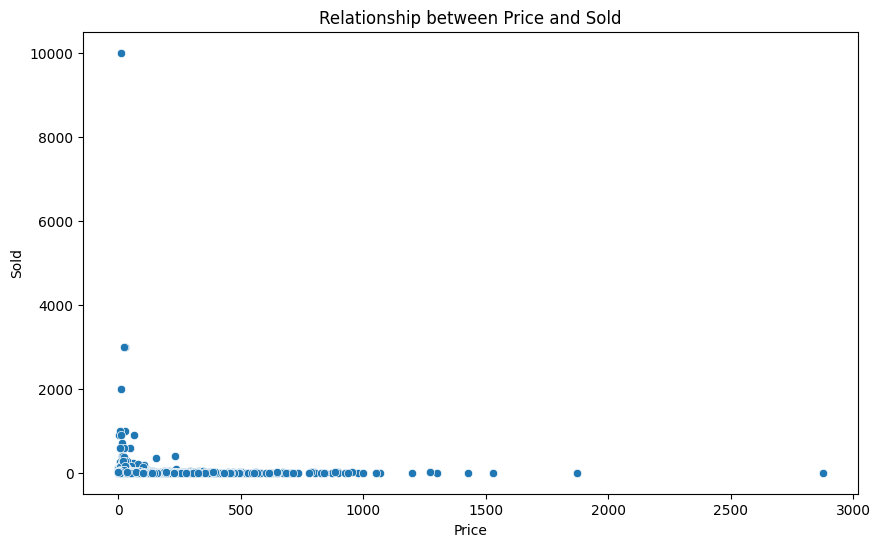

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Relationship between Price and Sold')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.show()

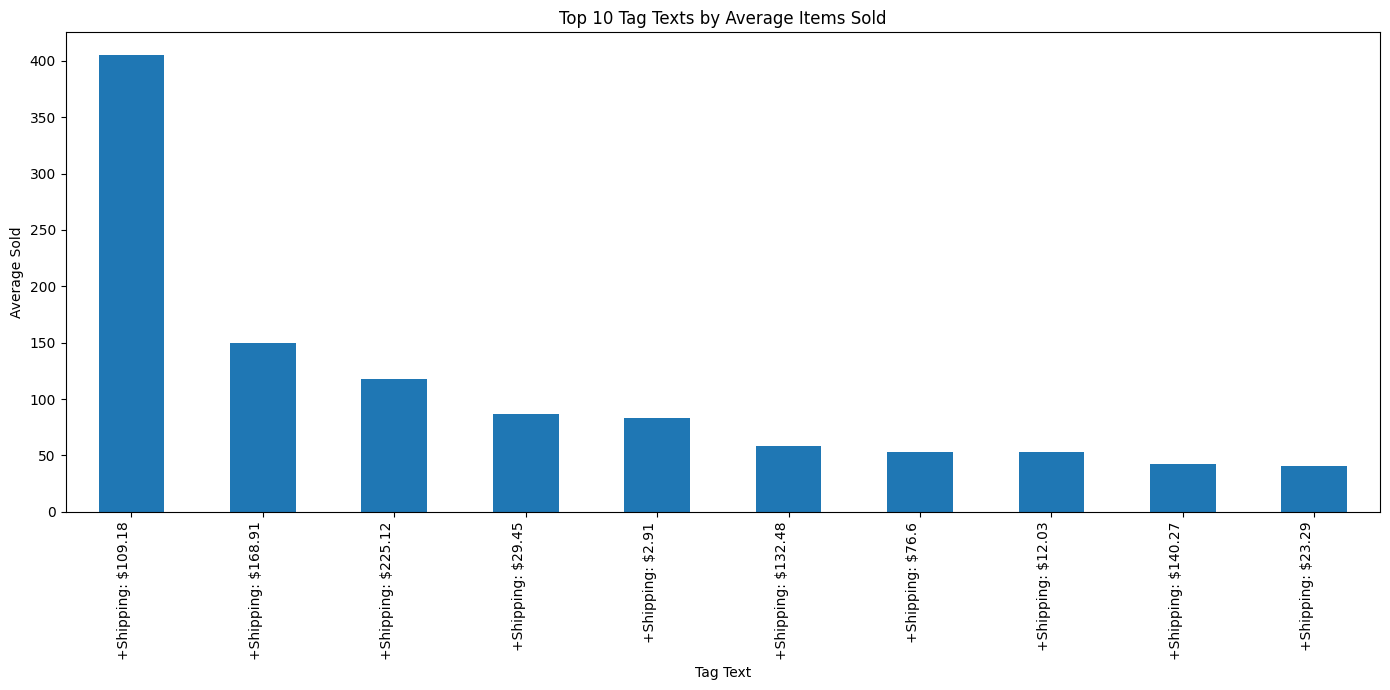

In [ ]:
average_sold_by_tag = df.groupby('tagText')['sold'].mean().sort_values(ascending=False)
top_tags = average_sold_by_tag.head(10)

plt.figure(figsize=(14, 7))
top_tags.plot(kind='bar')
plt.title('Top 10 Tag Texts by Average Items Sold')
plt.xlabel('Tag Text')
plt.ylabel('Average Sold')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

2) DISTRIBUTION OF THE PRICE

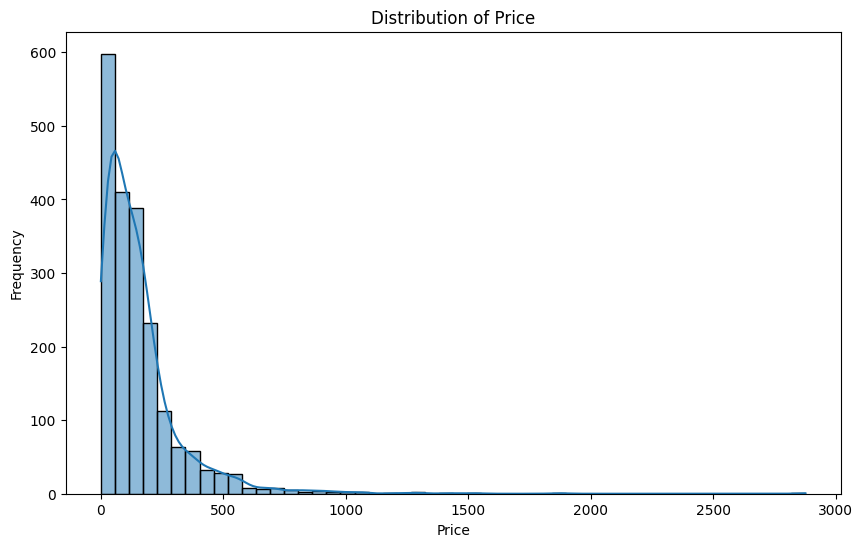

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

3) RELATIONSHIP BETWEEN PRICE AND SOLD

In [ ]:
numerical_cols = ['price', 'sold']
summary_stats = df[numerical_cols].describe()
print("Summary Statistics for Numerical Columns:")
display(summary_stats)

Summary Statistics for Numerical Columns:


,price,sold
count,2000.000000,2000.000000
mean,156.560020,23.493500
std,176.936735,254.094061
min,0.990000,0.000000
25%,48.530000,1.000000
50%,114.080000,3.000000
75%,193.490000,9.000000
max,2876.380000,10000.000000


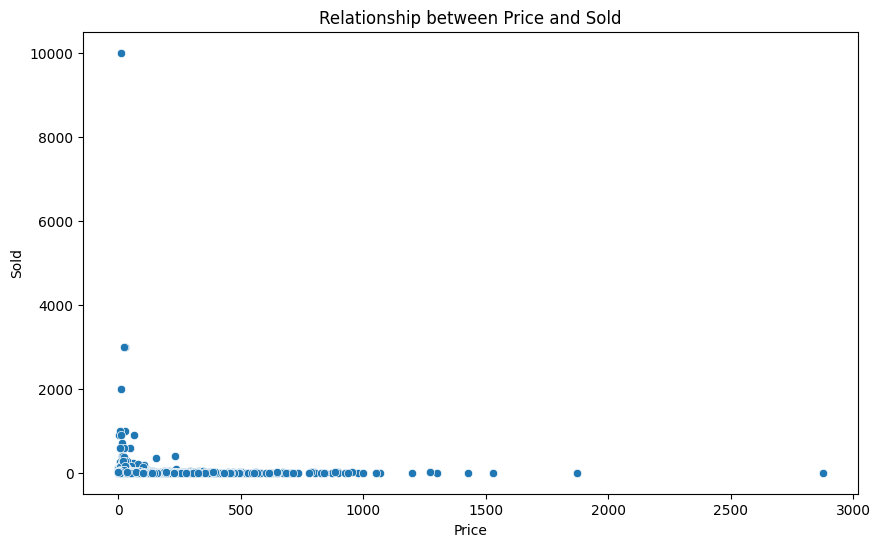

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Relationship between Price and Sold')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.show()

**PREDICTIVE DATA ANALYSIS(PDA)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
linear_model_restart = LinearRegression()
model_restart = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', linear_model_restart)])

model_restart.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_restart = model_restart.predict(X_test)
mse_restart = mean_squared_error(y_test, y_pred_restart)
r2_restart = r2_score(y_test, y_pred_restart)

print(f"Mean Squared Error (MSE) on the test set (Restarted Linear Regression): {mse_restart:.2f}")
print(f"R-squared (R2) on the test set (Restarted Linear Regression): {r2_restart:.2f}")

Mean Squared Error (MSE) on the test set (Restarted Linear Regression): 5404.65
R-squared (R2) on the test set (Restarted Linear Regression): 0.01
